In [1]:
from sklearn.svm import SVC
from sklearn import preprocessing
import numpy as np
def loadDataSet(fileName,fromLine,toLine,avoidFrom=0,avoidTo=0,ifPreprocess=False,ifNormalize=False):
    dataMat=[]
    labelMat=[]
    inFile=open(fileName)
    inFile.readline()
    lineNumber=0
    for line in inFile.readlines():
        if(avoidFrom!=avoidTo):
            if((lineNumber<=toLine and lineNumber>=fromLine) and (lineNumber<avoidFrom or lineNumber>avoidTo)):
                tempMat=[]
                lineArr=line.split(',')
                labelMat.append(float(lineArr[1]))
                for element in lineArr[2:]:
                    tempMat.append(float(element))
                dataMat.append(tempMat)
                lineNumber+=1
            elif(lineNumber>toLine):
                break
            else:
                lineNumber+=1
                continue
        else:
            if(lineNumber<=toLine and lineNumber>=fromLine):
                tempMat=[]
                lineArr=line.split(',')
                labelMat.append(float(lineArr[1]))
                for element in lineArr[2:]:
                    tempMat.append(float(element))
                dataMat.append(tempMat)
                lineNumber+=1
            elif(lineNumber<toLine):
                lineNumber+=1
                continue
            else:
                break
    if(ifPreprocess):
        dataMat=preprocessing.scale(dataMat)
    if(ifNormalize):
        normalizer = preprocessing.Normalizer().fit(dataMat)
        dataMat=normalizer.transform(dataMat)
    return dataMat,labelMat
def main():
    print("Trying gamma from 1 to 30")
    gammaList=list(range(1,30,1))
    for gammaE in gammaList:
        print("############Gamma now is %d###############"%gammaE)
        print("--------Without Normalize or preprocess-------")
        #choose the best part of testing
        Testsize=50
        testRange=list(range(0,250,Testsize))
        for begin in testRange:
            print("\nThe range of test data is [%d,%d]:"%(begin,begin+Testsize))
            X,y=loadDataSet("train.csv",0,249,begin,begin+Testsize)
            Xtest,ytest=loadDataSet("train.csv",begin,begin+Testsize)
            clf_rbf=SVC(kernel='rbf',gamma=gammaE)#use the  rbf kernel function
            clf_rbf.fit(X,y)
            score_rbf=clf_rbf.score(Xtest,ytest)
            print("score_rbf:%f"%score_rbf)
            clf_linear=SVC(kernel='linear')#use the  rbf kernel function
            clf_linear.fit(X,y)
            score_linear=clf_linear.score(Xtest,ytest)
            print("score_linear:%f"%score_linear)
            clf_poly=SVC(kernel='poly')#use the  rbf kernel function
            clf_poly.fit(X,y)
            score_poly=clf_poly.score(Xtest,ytest)
            print("score_poly:%f"%score_poly)
        print("----------------Preprocess--------------------")
        #choose the best part of testing
        Testsize=50
        testRange=list(range(0,250,Testsize))
        for begin in testRange:
            print("\nThe range of test data is [%d,%d]:"%(begin,begin+Testsize))
            X,y=loadDataSet("train.csv",0,249,begin,begin+Testsize,True)
            Xtest,ytest=loadDataSet("train.csv",begin,begin+Testsize,True)
            clf_rbf=SVC(kernel='rbf',gamma=gammaE)#use the  rbf kernel function
            clf_rbf.fit(X,y)
            score_rbf=clf_rbf.score(Xtest,ytest)
            print("score_rbf:%f"%score_rbf)
            clf_linear=SVC(kernel='linear')#use the  rbf kernel function
            clf_linear.fit(X,y)
            score_linear=clf_linear.score(Xtest,ytest)
            print("score_linear:%f"%score_linear)
            clf_poly=SVC(kernel='poly')#use the  rbf kernel function
            clf_poly.fit(X,y)
            score_poly=clf_poly.score(Xtest,ytest)
            print("score_poly:%f"%score_poly)
        print("---------------Normalize-----------------------")
        Testsize=50
        testRange=list(range(0,250,Testsize))
        for begin in testRange:
            print("\nThe range of test data is [%d,%d]:"%(begin,begin+Testsize))
            X,y=loadDataSet("train.csv",0,249,begin,begin+Testsize,ifNormalize=True)
            Xtest,ytest=loadDataSet("train.csv",begin,begin+Testsize,ifNormalize=True)
            clf_rbf=SVC(kernel='rbf',gamma=gammaE)#use the  rbf kernel function
            clf_rbf.fit(X,y)
            score_rbf=clf_rbf.score(Xtest,ytest)
            print("score_rbf:%f"%score_rbf)
            clf_linear=SVC(kernel='linear')#use the  rbf kernel function
            clf_linear.fit(X,y)
            score_linear=clf_linear.score(Xtest,ytest)
            print("score_linear:%f"%score_linear)
            clf_poly=SVC(kernel='poly')#use the  rbf kernel function
            clf_poly.fit(X,y)
            score_poly=clf_poly.score(Xtest,ytest)
            print("score_poly:%f"%score_poly)
        print("---------------Preprocess and Normalize-----------------------")
        Testsize=50
        testRange=list(range(0,250,Testsize))
        for begin in testRange:
            print("\nThe range of test data is [%d,%d]:"%(begin,begin+Testsize))
            X,y=loadDataSet("train.csv",0,249,begin,begin+Testsize,True,True)
            Xtest,ytest=loadDataSet("train.csv",begin,begin+Testsize,True,True)
            clf_rbf=SVC(kernel='rbf',gamma=gammaE)#use the  rbf kernel function
            clf_rbf.fit(X,y)
            score_rbf=clf_rbf.score(Xtest,ytest)
            print("score_rbf:%f"%score_rbf)
            clf_linear=SVC(kernel='linear')#use the  rbf kernel function
            clf_linear.fit(X,y)
            score_linear=clf_linear.score(Xtest,ytest)
            print("score_linear:%f"%score_linear)
            clf_poly=SVC(kernel='poly')#use the  rbf kernel function
            clf_poly.fit(X,y)
            score_poly=clf_poly.score(Xtest,ytest)
            print("score_poly:%f"%score_poly)
main()

Trying gamma from 1 to 30
############Gamma now is 1###############
--------Without Normalize or preprocess-------

The range of test data is [0,50]:
score_rbf:0.803922
score_linear:0.725490
score_poly:0.803922

The range of test data is [50,100]:
score_rbf:0.666667
score_linear:0.686275
score_poly:0.666667

The range of test data is [100,150]:


/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


score_rbf:0.588235
score_linear:0.764706
score_poly:0.588235

The range of test data is [150,200]:
score_rbf:0.588235
score_linear:0.666667
score_poly:0.588235

The range of test data is [200,250]:
score_rbf:0.560000
score_linear:0.660000


/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


score_poly:0.560000
----------------Preprocess--------------------

The range of test data is [0,50]:
score_rbf:0.803922
score_linear:0.705882
score_poly:0.803922

The range of test data is [50,100]:
score_rbf:0.666667
score_linear:0.705882
score_poly:0.666667

The range of test data is [100,150]:
score_rbf:0.588235
score_linear:0.764706
score_poly:0.588235

The range of test data is [150,200]:
score_rbf:0.588235
score_linear:0.666667
score_poly:0.588235

The range of test data is [200,250]:
score_rbf:0.560000
score_linear:0.660000
score_poly:0.560000
---------------Normalize-----------------------

The range of test data is [0,50]:
score_rbf:0.823529
score_linear:0.784314
score_poly:0.803922

The range of test data is [50,100]:
score_rbf:0.666667
score_linear:0.745098


/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


score_poly:0.666667

The range of test data is [100,150]:
score_rbf:0.607843
score_linear:0.666667
score_poly:0.588235

The range of test data is [150,200]:
score_rbf:0.588235
score_linear:0.666667
score_poly:0.588235

The range of test data is [200,250]:


/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


score_rbf:0.560000
score_linear:0.580000
score_poly:0.560000
---------------Preprocess and Normalize-----------------------

The range of test data is [0,50]:
score_rbf:0.803922
score_linear:0.647059
score_poly:0.803922

The range of test data is [50,100]:
score_rbf:0.666667
score_linear:0.647059
score_poly:0.666667

The range of test data is [100,150]:


/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


score_rbf:0.588235
score_linear:0.725490
score_poly:0.588235

The range of test data is [150,200]:
score_rbf:0.588235
score_linear:0.627451
score_poly:0.588235

The range of test data is [200,250]:
score_rbf:0.560000
score_linear:0.700000
score_poly:0.560000
############Gamma now is 2###############
--------Without Normalize or preprocess-------

The range of test data is [0,50]:


/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


score_rbf:0.803922
score_linear:0.725490
score_poly:0.803922

The range of test data is [50,100]:
score_rbf:0.666667
score_linear:0.686275
score_poly:0.666667

The range of test data is [100,150]:
score_rbf:0.588235
score_linear:0.764706
score_poly:0.588235

The range of test data is [150,200]:
score_rbf:0.588235
score_linear:0.666667
score_poly:0.588235

The range of test data is [200,250]:
score_rbf:0.560000
score_linear:0.660000


/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


score_poly:0.560000
----------------Preprocess--------------------

The range of test data is [0,50]:
score_rbf:0.803922
score_linear:0.705882
score_poly:0.803922

The range of test data is [50,100]:
score_rbf:0.666667
score_linear:0.705882
score_poly:0.666667

The range of test data is [100,150]:
score_rbf:0.588235
score_linear:0.764706
score_poly:0.588235

The range of test data is [150,200]:
score_rbf:0.588235
score_linear:0.666667
score_poly:0.588235

The range of test data is [200,250]:
score_rbf:0.560000
score_linear:0.660000
score_poly:0.560000
---------------Normalize-----------------------

The range of test data is [0,50]:
score_rbf:0.803922
score_linear:0.784314
score_poly:0.803922

The range of test data is [50,100]:
score_rbf:0.666667
score_linear:0.745098
score_poly:0.666667

The range of test data is [100,150]:


/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


score_rbf:0.588235
score_linear:0.666667
score_poly:0.588235

The range of test data is [150,200]:
score_rbf:0.588235
score_linear:0.666667
score_poly:0.588235

The range of test data is [200,250]:
score_rbf:0.560000
score_linear:0.580000
score_poly:0.560000
---------------Preprocess and Normalize-----------------------

The range of test data is [0,50]:


/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


score_rbf:0.803922
score_linear:0.647059
score_poly:0.803922

The range of test data is [50,100]:
score_rbf:0.666667
score_linear:0.647059
score_poly:0.666667

The range of test data is [100,150]:
score_rbf:0.588235
score_linear:0.725490


/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


score_poly:0.588235

The range of test data is [150,200]:
score_rbf:0.588235
score_linear:0.627451
score_poly:0.588235

The range of test data is [200,250]:
score_rbf:0.560000
score_linear:0.700000
score_poly:0.560000
############Gamma now is 3###############
--------Without Normalize or preprocess-------

The range of test data is [0,50]:


/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


score_rbf:0.803922
score_linear:0.725490
score_poly:0.803922

The range of test data is [50,100]:
score_rbf:0.666667
score_linear:0.686275
score_poly:0.666667

The range of test data is [100,150]:
score_rbf:0.588235
score_linear:0.764706
score_poly:0.588235

The range of test data is [150,200]:
score_rbf:0.588235
score_linear:0.666667
score_poly:0.588235

The range of test data is [200,250]:
score_rbf:0.560000
score_linear:0.660000


/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


score_poly:0.560000
----------------Preprocess--------------------

The range of test data is [0,50]:
score_rbf:0.803922
score_linear:0.705882
score_poly:0.803922

The range of test data is [50,100]:
score_rbf:0.666667
score_linear:0.705882
score_poly:0.666667

The range of test data is [100,150]:
score_rbf:0.588235
score_linear:0.764706
score_poly:0.588235

The range of test data is [150,200]:
score_rbf:0.588235
score_linear:0.666667
score_poly:0.588235

The range of test data is [200,250]:
score_rbf:0.560000
score_linear:0.660000
score_poly:0.560000
---------------Normalize-----------------------

The range of test data is [0,50]:
score_rbf:0.803922
score_linear:0.784314
score_poly:0.803922

The range of test data is [50,100]:
score_rbf:0.666667
score_linear:0.745098
score_poly:0.666667

The range of test data is [100,150]:


/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


score_rbf:0.588235
score_linear:0.666667
score_poly:0.588235

The range of test data is [150,200]:
score_rbf:0.588235
score_linear:0.666667
score_poly:0.588235

The range of test data is [200,250]:
score_rbf:0.560000
score_linear:0.580000


/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


score_poly:0.560000
---------------Preprocess and Normalize-----------------------

The range of test data is [0,50]:
score_rbf:0.803922
score_linear:0.647059
score_poly:0.803922

The range of test data is [50,100]:
score_rbf:0.666667
score_linear:0.647059
score_poly:0.666667

The range of test data is [100,150]:


/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


score_rbf:0.588235
score_linear:0.725490
score_poly:0.588235

The range of test data is [150,200]:
score_rbf:0.588235
score_linear:0.627451
score_poly:0.588235

The range of test data is [200,250]:
score_rbf:0.560000
score_linear:0.700000
score_poly:0.560000
############Gamma now is 4###############
--------Without Normalize or preprocess-------

The range of test data is [0,50]:


/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


score_rbf:0.803922
score_linear:0.725490
score_poly:0.803922

The range of test data is [50,100]:
score_rbf:0.666667
score_linear:0.686275
score_poly:0.666667

The range of test data is [100,150]:
score_rbf:0.588235
score_linear:0.764706


/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


score_poly:0.588235

The range of test data is [150,200]:
score_rbf:0.588235
score_linear:0.666667
score_poly:0.588235

The range of test data is [200,250]:
score_rbf:0.560000
score_linear:0.660000
score_poly:0.560000
----------------Preprocess--------------------

The range of test data is [0,50]:
score_rbf:0.803922
score_linear:0.705882
score_poly:0.803922

The range of test data is [50,100]:
score_rbf:0.666667
score_linear:0.705882
score_poly:0.666667

The range of test data is [100,150]:
score_rbf:0.588235
score_linear:0.764706
score_poly:0.588235

The range of test data is [150,200]:
score_rbf:0.588235
score_linear:0.666667
score_poly:0.588235

The range of test data is [200,250]:
score_rbf:0.560000
score_linear:0.660000
score_poly:0.560000
---------------Normalize-----------------------

The range of test data is [0,50]:
score_rbf:0.803922
score_linear:0.784314
score_poly:0.803922

The range of test data is [50,100]:
score_rbf:0.666667
score_linear:0.745098
score_poly:0.666667

T

/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


score_rbf:0.588235
score_linear:0.666667
score_poly:0.588235

The range of test data is [200,250]:
score_rbf:0.560000
score_linear:0.580000
score_poly:0.560000
---------------Preprocess and Normalize-----------------------

The range of test data is [0,50]:
score_rbf:0.803922
score_linear:0.647059
score_poly:0.803922

The range of test data is [50,100]:


/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


score_rbf:0.666667
score_linear:0.647059
score_poly:0.666667

The range of test data is [100,150]:
score_rbf:0.588235
score_linear:0.725490
score_poly:0.588235

The range of test data is [150,200]:
score_rbf:0.588235
score_linear:0.627451
score_poly:0.588235

The range of test data is [200,250]:


/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


score_rbf:0.560000
score_linear:0.700000
score_poly:0.560000
############Gamma now is 5###############
--------Without Normalize or preprocess-------

The range of test data is [0,50]:
score_rbf:0.803922
score_linear:0.725490
score_poly:0.803922

The range of test data is [50,100]:
score_rbf:0.666667
score_linear:0.686275


/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


score_poly:0.666667

The range of test data is [100,150]:
score_rbf:0.588235
score_linear:0.764706
score_poly:0.588235

The range of test data is [150,200]:
score_rbf:0.588235
score_linear:0.666667
score_poly:0.588235

The range of test data is [200,250]:


/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


score_rbf:0.560000
score_linear:0.660000
score_poly:0.560000
----------------Preprocess--------------------

The range of test data is [0,50]:
score_rbf:0.803922
score_linear:0.705882
score_poly:0.803922

The range of test data is [50,100]:
score_rbf:0.666667
score_linear:0.705882
score_poly:0.666667

The range of test data is [100,150]:
score_rbf:0.588235
score_linear:0.764706
score_poly:0.588235

The range of test data is [150,200]:
score_rbf:0.588235
score_linear:0.666667
score_poly:0.588235

The range of test data is [200,250]:
score_rbf:0.560000
score_linear:0.660000
score_poly:0.560000
---------------Normalize-----------------------

The range of test data is [0,50]:
score_rbf:0.803922
score_linear:0.784314
score_poly:0.803922

The range of test data is [50,100]:
score_rbf:0.666667
score_linear:0.745098


/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


score_poly:0.666667

The range of test data is [100,150]:
score_rbf:0.588235
score_linear:0.666667
score_poly:0.588235

The range of test data is [150,200]:
score_rbf:0.588235
score_linear:0.666667
score_poly:0.588235

The range of test data is [200,250]:
score_rbf:0.560000


/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


score_linear:0.580000
score_poly:0.560000
---------------Preprocess and Normalize-----------------------

The range of test data is [0,50]:
score_rbf:0.803922
score_linear:0.647059
score_poly:0.803922

The range of test data is [50,100]:
score_rbf:0.666667
score_linear:0.647059
score_poly:0.666667

The range of test data is [100,150]:


/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


score_rbf:0.588235
score_linear:0.725490
score_poly:0.588235

The range of test data is [150,200]:
score_rbf:0.588235
score_linear:0.627451
score_poly:0.588235

The range of test data is [200,250]:
score_rbf:0.560000
score_linear:0.700000
score_poly:0.560000
############Gamma now is 6###############
--------Without Normalize or preprocess-------

The range of test data is [0,50]:


/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


score_rbf:0.803922
score_linear:0.725490
score_poly:0.803922

The range of test data is [50,100]:
score_rbf:0.666667
score_linear:0.686275
score_poly:0.666667

The range of test data is [100,150]:
score_rbf:0.588235
score_linear:0.764706
score_poly:0.588235

The range of test data is [150,200]:
score_rbf:0.588235
score_linear:0.666667
score_poly:0.588235

The range of test data is [200,250]:
score_rbf:0.560000
score_linear:0.660000
score_poly:0.560000
----------------Preprocess--------------------

The range of test data is [0,50]:


/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


score_rbf:0.803922
score_linear:0.705882
score_poly:0.803922

The range of test data is [50,100]:
score_rbf:0.666667
score_linear:0.705882
score_poly:0.666667

The range of test data is [100,150]:
score_rbf:0.588235
score_linear:0.764706
score_poly:0.588235

The range of test data is [150,200]:
score_rbf:0.588235
score_linear:0.666667
score_poly:0.588235

The range of test data is [200,250]:
score_rbf:0.560000
score_linear:0.660000
score_poly:0.560000
---------------Normalize-----------------------

The range of test data is [0,50]:
score_rbf:0.803922
score_linear:0.784314
score_poly:0.803922

The range of test data is [50,100]:
score_rbf:0.666667
score_linear:0.745098
score_poly:0.666667

The range of test data is [100,150]:
score_rbf:0.588235
score_linear:0.666667
score_poly:0.588235

The range of test data is [150,200]:


/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


score_rbf:0.588235
score_linear:0.666667
score_poly:0.588235

The range of test data is [200,250]:
score_rbf:0.560000
score_linear:0.580000
score_poly:0.560000
---------------Preprocess and Normalize-----------------------

The range of test data is [0,50]:
score_rbf:0.803922
score_linear:0.647059
score_poly:0.803922

The range of test data is [50,100]:


/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


score_rbf:0.666667
score_linear:0.647059
score_poly:0.666667

The range of test data is [100,150]:
score_rbf:0.588235
score_linear:0.725490
score_poly:0.588235

The range of test data is [150,200]:
score_rbf:0.588235
score_linear:0.627451
score_poly:0.588235

The range of test data is [200,250]:


/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


score_rbf:0.560000
score_linear:0.700000
score_poly:0.560000
############Gamma now is 7###############
--------Without Normalize or preprocess-------

The range of test data is [0,50]:
score_rbf:0.803922
score_linear:0.725490
score_poly:0.803922

The range of test data is [50,100]:
score_rbf:0.666667
score_linear:0.686275


/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


score_poly:0.666667

The range of test data is [100,150]:
score_rbf:0.588235
score_linear:0.764706
score_poly:0.588235

The range of test data is [150,200]:
score_rbf:0.588235
score_linear:0.666667
score_poly:0.588235

The range of test data is [200,250]:


/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


score_rbf:0.560000
score_linear:0.660000
score_poly:0.560000
----------------Preprocess--------------------

The range of test data is [0,50]:
score_rbf:0.803922
score_linear:0.705882
score_poly:0.803922

The range of test data is [50,100]:
score_rbf:0.666667
score_linear:0.705882
score_poly:0.666667

The range of test data is [100,150]:
score_rbf:0.588235
score_linear:0.764706
score_poly:0.588235

The range of test data is [150,200]:
score_rbf:0.588235
score_linear:0.666667
score_poly:0.588235

The range of test data is [200,250]:
score_rbf:0.560000
score_linear:0.660000
score_poly:0.560000
---------------Normalize-----------------------

The range of test data is [0,50]:
score_rbf:0.803922
score_linear:0.784314
score_poly:0.803922

The range of test data is [50,100]:
score_rbf:0.666667
score_linear:0.745098


/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


score_poly:0.666667

The range of test data is [100,150]:
score_rbf:0.588235
score_linear:0.666667
score_poly:0.588235

The range of test data is [150,200]:
score_rbf:0.588235
score_linear:0.666667
score_poly:0.588235

The range of test data is [200,250]:


/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


score_rbf:0.560000
score_linear:0.580000
score_poly:0.560000
---------------Preprocess and Normalize-----------------------

The range of test data is [0,50]:
score_rbf:0.803922
score_linear:0.647059
score_poly:0.803922

The range of test data is [50,100]:
score_rbf:0.666667
score_linear:0.647059


/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


score_poly:0.666667

The range of test data is [100,150]:
score_rbf:0.588235
score_linear:0.725490
score_poly:0.588235

The range of test data is [150,200]:
score_rbf:0.588235
score_linear:0.627451
score_poly:0.588235

The range of test data is [200,250]:
score_rbf:0.560000
score_linear:0.700000
score_poly:0.560000
############Gamma now is 8###############
--------Without Normalize or preprocess-------

The range of test data is [0,50]:
score_rbf:0.803922
score_linear:0.725490
score_poly:0.803922

The range of test data is [50,100]:
score_rbf:0.666667
score_linear:0.686275


/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


score_poly:0.666667

The range of test data is [100,150]:
score_rbf:0.588235
score_linear:0.764706
score_poly:0.588235

The range of test data is [150,200]:
score_rbf:0.588235
score_linear:0.666667
score_poly:0.588235

The range of test data is [200,250]:


/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


score_rbf:0.560000
score_linear:0.660000
score_poly:0.560000
----------------Preprocess--------------------

The range of test data is [0,50]:
score_rbf:0.803922
score_linear:0.705882
score_poly:0.803922

The range of test data is [50,100]:
score_rbf:0.666667
score_linear:0.705882
score_poly:0.666667

The range of test data is [100,150]:
score_rbf:0.588235
score_linear:0.764706
score_poly:0.588235

The range of test data is [150,200]:
score_rbf:0.588235
score_linear:0.666667
score_poly:0.588235

The range of test data is [200,250]:
score_rbf:0.560000
score_linear:0.660000
score_poly:0.560000
---------------Normalize-----------------------

The range of test data is [0,50]:
score_rbf:0.803922
score_linear:0.784314
score_poly:0.803922

The range of test data is [50,100]:
score_rbf:0.666667
score_linear:0.745098


/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


score_poly:0.666667

The range of test data is [100,150]:
score_rbf:0.588235
score_linear:0.666667
score_poly:0.588235

The range of test data is [150,200]:
score_rbf:0.588235
score_linear:0.666667
score_poly:0.588235

The range of test data is [200,250]:
score_rbf:0.560000


/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


score_linear:0.580000
score_poly:0.560000
---------------Preprocess and Normalize-----------------------

The range of test data is [0,50]:
score_rbf:0.803922
score_linear:0.647059
score_poly:0.803922

The range of test data is [50,100]:
score_rbf:0.666667
score_linear:0.647059
score_poly:0.666667

The range of test data is [100,150]:


/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


score_rbf:0.588235
score_linear:0.725490
score_poly:0.588235

The range of test data is [150,200]:
score_rbf:0.588235
score_linear:0.627451
score_poly:0.588235

The range of test data is [200,250]:
score_rbf:0.560000
score_linear:0.700000
score_poly:0.560000
############Gamma now is 9###############
--------Without Normalize or preprocess-------

The range of test data is [0,50]:


/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


score_rbf:0.803922
score_linear:0.725490
score_poly:0.803922

The range of test data is [50,100]:
score_rbf:0.666667
score_linear:0.686275
score_poly:0.666667

The range of test data is [100,150]:
score_rbf:0.588235
score_linear:0.764706


/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


score_poly:0.588235

The range of test data is [150,200]:
score_rbf:0.588235
score_linear:0.666667
score_poly:0.588235

The range of test data is [200,250]:
score_rbf:0.560000
score_linear:0.660000
score_poly:0.560000
----------------Preprocess--------------------

The range of test data is [0,50]:
score_rbf:0.803922
score_linear:0.705882
score_poly:0.803922

The range of test data is [50,100]:
score_rbf:0.666667
score_linear:0.705882
score_poly:0.666667

The range of test data is [100,150]:
score_rbf:0.588235
score_linear:0.764706
score_poly:0.588235

The range of test data is [150,200]:
score_rbf:0.588235
score_linear:0.666667
score_poly:0.588235

The range of test data is [200,250]:
score_rbf:0.560000
score_linear:0.660000
score_poly:0.560000
---------------Normalize-----------------------

The range of test data is [0,50]:
score_rbf:0.803922
score_linear:0.784314
score_poly:0.803922

The range of test data is [50,100]:
score_rbf:0.666667
score_linear:0.745098
score_poly:0.666667

T

/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


score_rbf:0.588235
score_linear:0.666667
score_poly:0.588235

The range of test data is [200,250]:
score_rbf:0.560000
score_linear:0.580000
score_poly:0.560000
---------------Preprocess and Normalize-----------------------

The range of test data is [0,50]:
score_rbf:0.803922
score_linear:0.647059
score_poly:0.803922

The range of test data is [50,100]:


/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


score_rbf:0.666667
score_linear:0.647059
score_poly:0.666667

The range of test data is [100,150]:
score_rbf:0.588235
score_linear:0.725490
score_poly:0.588235

The range of test data is [150,200]:
score_rbf:0.588235
score_linear:0.627451
score_poly:0.588235

The range of test data is [200,250]:


/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


score_rbf:0.560000
score_linear:0.700000
score_poly:0.560000
############Gamma now is 10###############
--------Without Normalize or preprocess-------

The range of test data is [0,50]:
score_rbf:0.803922
score_linear:0.725490
score_poly:0.803922

The range of test data is [50,100]:
score_rbf:0.666667
score_linear:0.686275
score_poly:0.666667

The range of test data is [100,150]:


/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


score_rbf:0.588235
score_linear:0.764706
score_poly:0.588235

The range of test data is [150,200]:
score_rbf:0.588235
score_linear:0.666667
score_poly:0.588235

The range of test data is [200,250]:
score_rbf:0.560000
score_linear:0.660000


/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


score_poly:0.560000
----------------Preprocess--------------------

The range of test data is [0,50]:
score_rbf:0.803922
score_linear:0.705882
score_poly:0.803922

The range of test data is [50,100]:
score_rbf:0.666667
score_linear:0.705882
score_poly:0.666667

The range of test data is [100,150]:
score_rbf:0.588235
score_linear:0.764706
score_poly:0.588235

The range of test data is [150,200]:
score_rbf:0.588235
score_linear:0.666667
score_poly:0.588235

The range of test data is [200,250]:
score_rbf:0.560000
score_linear:0.660000
score_poly:0.560000
---------------Normalize-----------------------

The range of test data is [0,50]:
score_rbf:0.803922
score_linear:0.784314
score_poly:0.803922

The range of test data is [50,100]:
score_rbf:0.666667
score_linear:0.745098
score_poly:0.666667

The range of test data is [100,150]:
score_rbf:0.588235
score_linear:0.666667
score_poly:0.588235

The range of test data is [150,200]:


/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


score_rbf:0.588235
score_linear:0.666667
score_poly:0.588235

The range of test data is [200,250]:
score_rbf:0.560000
score_linear:0.580000
score_poly:0.560000
---------------Preprocess and Normalize-----------------------

The range of test data is [0,50]:
score_rbf:0.803922
score_linear:0.647059
score_poly:0.803922

The range of test data is [50,100]:


/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


score_rbf:0.666667
score_linear:0.647059
score_poly:0.666667

The range of test data is [100,150]:
score_rbf:0.588235
score_linear:0.725490
score_poly:0.588235

The range of test data is [150,200]:
score_rbf:0.588235
score_linear:0.627451
score_poly:0.588235

The range of test data is [200,250]:


/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


score_rbf:0.560000
score_linear:0.700000
score_poly:0.560000
############Gamma now is 11###############
--------Without Normalize or preprocess-------

The range of test data is [0,50]:
score_rbf:0.803922
score_linear:0.725490
score_poly:0.803922

The range of test data is [50,100]:
score_rbf:0.666667
score_linear:0.686275
score_poly:0.666667

The range of test data is [100,150]:


/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


score_rbf:0.588235
score_linear:0.764706
score_poly:0.588235

The range of test data is [150,200]:
score_rbf:0.588235
score_linear:0.666667
score_poly:0.588235

The range of test data is [200,250]:
score_rbf:0.560000
score_linear:0.660000


/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


score_poly:0.560000
----------------Preprocess--------------------

The range of test data is [0,50]:
score_rbf:0.803922
score_linear:0.705882
score_poly:0.803922

The range of test data is [50,100]:
score_rbf:0.666667
score_linear:0.705882
score_poly:0.666667

The range of test data is [100,150]:
score_rbf:0.588235
score_linear:0.764706
score_poly:0.588235

The range of test data is [150,200]:
score_rbf:0.588235
score_linear:0.666667
score_poly:0.588235

The range of test data is [200,250]:
score_rbf:0.560000
score_linear:0.660000
score_poly:0.560000
---------------Normalize-----------------------

The range of test data is [0,50]:
score_rbf:0.803922
score_linear:0.784314
score_poly:0.803922

The range of test data is [50,100]:
score_rbf:0.666667
score_linear:0.745098
score_poly:0.666667

The range of test data is [100,150]:
score_rbf:0.588235


/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


score_linear:0.666667
score_poly:0.588235

The range of test data is [150,200]:
score_rbf:0.588235
score_linear:0.666667
score_poly:0.588235

The range of test data is [200,250]:
score_rbf:0.560000
score_linear:0.580000
score_poly:0.560000
---------------Preprocess and Normalize-----------------------

The range of test data is [0,50]:


/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


score_rbf:0.803922
score_linear:0.647059
score_poly:0.803922

The range of test data is [50,100]:
score_rbf:0.666667
score_linear:0.647059
score_poly:0.666667

The range of test data is [100,150]:
score_rbf:0.588235
score_linear:0.725490
score_poly:0.588235

The range of test data is [150,200]:


/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


score_rbf:0.588235
score_linear:0.627451
score_poly:0.588235

The range of test data is [200,250]:
score_rbf:0.560000
score_linear:0.700000
score_poly:0.560000
############Gamma now is 12###############
--------Without Normalize or preprocess-------

The range of test data is [0,50]:
score_rbf:0.803922
score_linear:0.725490
score_poly:0.803922

The range of test data is [50,100]:


/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


score_rbf:0.666667
score_linear:0.686275
score_poly:0.666667

The range of test data is [100,150]:
score_rbf:0.588235
score_linear:0.764706
score_poly:0.588235

The range of test data is [150,200]:
score_rbf:0.588235
score_linear:0.666667


/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


score_poly:0.588235

The range of test data is [200,250]:
score_rbf:0.560000
score_linear:0.660000
score_poly:0.560000
----------------Preprocess--------------------

The range of test data is [0,50]:
score_rbf:0.803922
score_linear:0.705882
score_poly:0.803922

The range of test data is [50,100]:
score_rbf:0.666667
score_linear:0.705882
score_poly:0.666667

The range of test data is [100,150]:
score_rbf:0.588235
score_linear:0.764706
score_poly:0.588235

The range of test data is [150,200]:
score_rbf:0.588235
score_linear:0.666667
score_poly:0.588235

The range of test data is [200,250]:
score_rbf:0.560000
score_linear:0.660000
score_poly:0.560000
---------------Normalize-----------------------

The range of test data is [0,50]:
score_rbf:0.803922
score_linear:0.784314
score_poly:0.803922

The range of test data is [50,100]:


/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


score_rbf:0.666667
score_linear:0.745098
score_poly:0.666667

The range of test data is [100,150]:
score_rbf:0.588235
score_linear:0.666667
score_poly:0.588235

The range of test data is [150,200]:
score_rbf:0.588235
score_linear:0.666667
score_poly:0.588235

The range of test data is [200,250]:


/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


score_rbf:0.560000
score_linear:0.580000
score_poly:0.560000
---------------Preprocess and Normalize-----------------------

The range of test data is [0,50]:
score_rbf:0.803922
score_linear:0.647059
score_poly:0.803922

The range of test data is [50,100]:
score_rbf:0.666667
score_linear:0.647059
score_poly:0.666667

The range of test data is [100,150]:


/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


score_rbf:0.588235
score_linear:0.725490
score_poly:0.588235

The range of test data is [150,200]:
score_rbf:0.588235
score_linear:0.627451
score_poly:0.588235

The range of test data is [200,250]:
score_rbf:0.560000
score_linear:0.700000
score_poly:0.560000
############Gamma now is 13###############
--------Without Normalize or preprocess-------

The range of test data is [0,50]:


/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


score_rbf:0.803922
score_linear:0.725490
score_poly:0.803922

The range of test data is [50,100]:
score_rbf:0.666667
score_linear:0.686275
score_poly:0.666667

The range of test data is [100,150]:
score_rbf:0.588235
score_linear:0.764706


/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


score_poly:0.588235

The range of test data is [150,200]:
score_rbf:0.588235
score_linear:0.666667
score_poly:0.588235

The range of test data is [200,250]:
score_rbf:0.560000
score_linear:0.660000
score_poly:0.560000
----------------Preprocess--------------------

The range of test data is [0,50]:
score_rbf:0.803922
score_linear:0.705882
score_poly:0.803922

The range of test data is [50,100]:
score_rbf:0.666667
score_linear:0.705882
score_poly:0.666667

The range of test data is [100,150]:
score_rbf:0.588235
score_linear:0.764706
score_poly:0.588235

The range of test data is [150,200]:
score_rbf:0.588235
score_linear:0.666667
score_poly:0.588235

The range of test data is [200,250]:
score_rbf:0.560000
score_linear:0.660000
score_poly:0.560000
---------------Normalize-----------------------

The range of test data is [0,50]:
score_rbf:0.803922
score_linear:0.784314
score_poly:0.803922

The range of test data is [50,100]:
score_rbf:0.666667
score_linear:0.745098
score_poly:0.666667

T

/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


score_rbf:0.588235
score_linear:0.666667
score_poly:0.588235

The range of test data is [200,250]:
score_rbf:0.560000
score_linear:0.580000
score_poly:0.560000
---------------Preprocess and Normalize-----------------------

The range of test data is [0,50]:
score_rbf:0.803922
score_linear:0.647059
score_poly:0.803922

The range of test data is [50,100]:


/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


score_rbf:0.666667
score_linear:0.647059
score_poly:0.666667

The range of test data is [100,150]:
score_rbf:0.588235
score_linear:0.725490
score_poly:0.588235

The range of test data is [150,200]:
score_rbf:0.588235
score_linear:0.627451
score_poly:0.588235

The range of test data is [200,250]:


/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


score_rbf:0.560000
score_linear:0.700000
score_poly:0.560000
############Gamma now is 14###############
--------Without Normalize or preprocess-------

The range of test data is [0,50]:
score_rbf:0.803922
score_linear:0.725490
score_poly:0.803922

The range of test data is [50,100]:
score_rbf:0.666667
score_linear:0.686275
score_poly:0.666667

The range of test data is [100,150]:


/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


score_rbf:0.588235
score_linear:0.764706
score_poly:0.588235

The range of test data is [150,200]:
score_rbf:0.588235
score_linear:0.666667
score_poly:0.588235

The range of test data is [200,250]:
score_rbf:0.560000
score_linear:0.660000


/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


score_poly:0.560000
----------------Preprocess--------------------

The range of test data is [0,50]:
score_rbf:0.803922
score_linear:0.705882
score_poly:0.803922

The range of test data is [50,100]:
score_rbf:0.666667
score_linear:0.705882
score_poly:0.666667

The range of test data is [100,150]:
score_rbf:0.588235
score_linear:0.764706
score_poly:0.588235

The range of test data is [150,200]:
score_rbf:0.588235
score_linear:0.666667
score_poly:0.588235

The range of test data is [200,250]:
score_rbf:0.560000
score_linear:0.660000
score_poly:0.560000
---------------Normalize-----------------------

The range of test data is [0,50]:
score_rbf:0.803922
score_linear:0.784314
score_poly:0.803922

The range of test data is [50,100]:
score_rbf:0.666667
score_linear:0.745098
score_poly:0.666667

The range of test data is [100,150]:


/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


score_rbf:0.588235
score_linear:0.666667
score_poly:0.588235

The range of test data is [150,200]:
score_rbf:0.588235
score_linear:0.666667
score_poly:0.588235

The range of test data is [200,250]:
score_rbf:0.560000
score_linear:0.580000


/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


score_poly:0.560000
---------------Preprocess and Normalize-----------------------

The range of test data is [0,50]:
score_rbf:0.803922
score_linear:0.647059
score_poly:0.803922

The range of test data is [50,100]:
score_rbf:0.666667
score_linear:0.647059
score_poly:0.666667

The range of test data is [100,150]:


/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


score_rbf:0.588235
score_linear:0.725490
score_poly:0.588235

The range of test data is [150,200]:
score_rbf:0.588235
score_linear:0.627451
score_poly:0.588235

The range of test data is [200,250]:
score_rbf:0.560000
score_linear:0.700000


/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


score_poly:0.560000
############Gamma now is 15###############
--------Without Normalize or preprocess-------

The range of test data is [0,50]:
score_rbf:0.803922
score_linear:0.725490
score_poly:0.803922

The range of test data is [50,100]:
score_rbf:0.666667
score_linear:0.686275
score_poly:0.666667

The range of test data is [100,150]:
score_rbf:0.588235
score_linear:0.764706
score_poly:0.588235

The range of test data is [150,200]:
score_rbf:0.588235
score_linear:0.666667
score_poly:0.588235

The range of test data is [200,250]:
score_rbf:0.560000
score_linear:0.660000


/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


score_poly:0.560000
----------------Preprocess--------------------

The range of test data is [0,50]:
score_rbf:0.803922
score_linear:0.705882
score_poly:0.803922

The range of test data is [50,100]:
score_rbf:0.666667
score_linear:0.705882
score_poly:0.666667

The range of test data is [100,150]:
score_rbf:0.588235
score_linear:0.764706
score_poly:0.588235

The range of test data is [150,200]:
score_rbf:0.588235
score_linear:0.666667
score_poly:0.588235

The range of test data is [200,250]:
score_rbf:0.560000
score_linear:0.660000
score_poly:0.560000
---------------Normalize-----------------------

The range of test data is [0,50]:
score_rbf:0.803922
score_linear:0.784314
score_poly:0.803922

The range of test data is [50,100]:
score_rbf:0.666667
score_linear:0.745098
score_poly:0.666667

The range of test data is [100,150]:


/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


score_rbf:0.588235
score_linear:0.666667
score_poly:0.588235

The range of test data is [150,200]:
score_rbf:0.588235
score_linear:0.666667
score_poly:0.588235

The range of test data is [200,250]:
score_rbf:0.560000
score_linear:0.580000


/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


score_poly:0.560000
---------------Preprocess and Normalize-----------------------

The range of test data is [0,50]:
score_rbf:0.803922
score_linear:0.647059
score_poly:0.803922

The range of test data is [50,100]:
score_rbf:0.666667
score_linear:0.647059
score_poly:0.666667

The range of test data is [100,150]:


/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


score_rbf:0.588235
score_linear:0.725490
score_poly:0.588235

The range of test data is [150,200]:
score_rbf:0.588235
score_linear:0.627451
score_poly:0.588235

The range of test data is [200,250]:
score_rbf:0.560000
score_linear:0.700000


/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


score_poly:0.560000
############Gamma now is 16###############
--------Without Normalize or preprocess-------

The range of test data is [0,50]:
score_rbf:0.803922
score_linear:0.725490
score_poly:0.803922

The range of test data is [50,100]:
score_rbf:0.666667
score_linear:0.686275
score_poly:0.666667

The range of test data is [100,150]:
score_rbf:0.588235
score_linear:0.764706
score_poly:0.588235

The range of test data is [150,200]:
score_rbf:0.588235
score_linear:0.666667
score_poly:0.588235

The range of test data is [200,250]:
score_rbf:0.560000
score_linear:0.660000


/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


score_poly:0.560000
----------------Preprocess--------------------

The range of test data is [0,50]:
score_rbf:0.803922
score_linear:0.705882
score_poly:0.803922

The range of test data is [50,100]:
score_rbf:0.666667
score_linear:0.705882
score_poly:0.666667

The range of test data is [100,150]:
score_rbf:0.588235
score_linear:0.764706
score_poly:0.588235

The range of test data is [150,200]:
score_rbf:0.588235
score_linear:0.666667
score_poly:0.588235

The range of test data is [200,250]:
score_rbf:0.560000
score_linear:0.660000
score_poly:0.560000
---------------Normalize-----------------------

The range of test data is [0,50]:
score_rbf:0.803922
score_linear:0.784314
score_poly:0.803922

The range of test data is [50,100]:
score_rbf:0.666667
score_linear:0.745098
score_poly:0.666667

The range of test data is [100,150]:
score_rbf:0.588235
score_linear:0.666667
score_poly:0.588235

The range of test data is [150,200]:


/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


score_rbf:0.588235
score_linear:0.666667
score_poly:0.588235

The range of test data is [200,250]:
score_rbf:0.560000
score_linear:0.580000
score_poly:0.560000
---------------Preprocess and Normalize-----------------------

The range of test data is [0,50]:
score_rbf:0.803922
score_linear:0.647059
score_poly:0.803922

The range of test data is [50,100]:


/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


score_rbf:0.666667
score_linear:0.647059
score_poly:0.666667

The range of test data is [100,150]:
score_rbf:0.588235
score_linear:0.725490
score_poly:0.588235

The range of test data is [150,200]:
score_rbf:0.588235
score_linear:0.627451
score_poly:0.588235

The range of test data is [200,250]:


/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


score_rbf:0.560000
score_linear:0.700000
score_poly:0.560000
############Gamma now is 17###############
--------Without Normalize or preprocess-------

The range of test data is [0,50]:
score_rbf:0.803922
score_linear:0.725490
score_poly:0.803922

The range of test data is [50,100]:
score_rbf:0.666667
score_linear:0.686275
score_poly:0.666667

The range of test data is [100,150]:


/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


score_rbf:0.588235
score_linear:0.764706
score_poly:0.588235

The range of test data is [150,200]:
score_rbf:0.588235
score_linear:0.666667
score_poly:0.588235

The range of test data is [200,250]:
score_rbf:0.560000
score_linear:0.660000


/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


score_poly:0.560000
----------------Preprocess--------------------

The range of test data is [0,50]:
score_rbf:0.803922
score_linear:0.705882
score_poly:0.803922

The range of test data is [50,100]:
score_rbf:0.666667
score_linear:0.705882
score_poly:0.666667

The range of test data is [100,150]:
score_rbf:0.588235
score_linear:0.764706
score_poly:0.588235

The range of test data is [150,200]:
score_rbf:0.588235
score_linear:0.666667
score_poly:0.588235

The range of test data is [200,250]:
score_rbf:0.560000
score_linear:0.660000
score_poly:0.560000
---------------Normalize-----------------------

The range of test data is [0,50]:
score_rbf:0.803922
score_linear:0.784314
score_poly:0.803922

The range of test data is [50,100]:
score_rbf:0.666667
score_linear:0.745098
score_poly:0.666667

The range of test data is [100,150]:
score_rbf:0.588235
score_linear:0.666667
score_poly:0.588235

The range of test data is [150,200]:


/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


score_rbf:0.588235
score_linear:0.666667
score_poly:0.588235

The range of test data is [200,250]:
score_rbf:0.560000
score_linear:0.580000
score_poly:0.560000
---------------Preprocess and Normalize-----------------------

The range of test data is [0,50]:
score_rbf:0.803922
score_linear:0.647059
score_poly:0.803922

The range of test data is [50,100]:


/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


score_rbf:0.666667
score_linear:0.647059
score_poly:0.666667

The range of test data is [100,150]:
score_rbf:0.588235
score_linear:0.725490
score_poly:0.588235

The range of test data is [150,200]:
score_rbf:0.588235
score_linear:0.627451
score_poly:0.588235

The range of test data is [200,250]:


/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


score_rbf:0.560000
score_linear:0.700000
score_poly:0.560000
############Gamma now is 18###############
--------Without Normalize or preprocess-------

The range of test data is [0,50]:
score_rbf:0.803922
score_linear:0.725490
score_poly:0.803922

The range of test data is [50,100]:
score_rbf:0.666667
score_linear:0.686275
score_poly:0.666667

The range of test data is [100,150]:


/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


score_rbf:0.588235
score_linear:0.764706
score_poly:0.588235

The range of test data is [150,200]:
score_rbf:0.588235
score_linear:0.666667
score_poly:0.588235

The range of test data is [200,250]:
score_rbf:0.560000
score_linear:0.660000


/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


score_poly:0.560000
----------------Preprocess--------------------

The range of test data is [0,50]:
score_rbf:0.803922
score_linear:0.705882
score_poly:0.803922

The range of test data is [50,100]:
score_rbf:0.666667
score_linear:0.705882
score_poly:0.666667

The range of test data is [100,150]:
score_rbf:0.588235
score_linear:0.764706
score_poly:0.588235

The range of test data is [150,200]:
score_rbf:0.588235
score_linear:0.666667
score_poly:0.588235

The range of test data is [200,250]:
score_rbf:0.560000
score_linear:0.660000
score_poly:0.560000
---------------Normalize-----------------------

The range of test data is [0,50]:
score_rbf:0.803922
score_linear:0.784314
score_poly:0.803922

The range of test data is [50,100]:
score_rbf:0.666667
score_linear:0.745098
score_poly:0.666667

The range of test data is [100,150]:
score_rbf:0.588235
score_linear:0.666667
score_poly:0.588235

The range of test data is [150,200]:


/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


score_rbf:0.588235
score_linear:0.666667
score_poly:0.588235

The range of test data is [200,250]:
score_rbf:0.560000
score_linear:0.580000
score_poly:0.560000
---------------Preprocess and Normalize-----------------------

The range of test data is [0,50]:
score_rbf:0.803922
score_linear:0.647059
score_poly:0.803922

The range of test data is [50,100]:


/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


score_rbf:0.666667
score_linear:0.647059
score_poly:0.666667

The range of test data is [100,150]:
score_rbf:0.588235
score_linear:0.725490
score_poly:0.588235

The range of test data is [150,200]:
score_rbf:0.588235
score_linear:0.627451
score_poly:0.588235

The range of test data is [200,250]:


/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


score_rbf:0.560000
score_linear:0.700000
score_poly:0.560000
############Gamma now is 19###############
--------Without Normalize or preprocess-------

The range of test data is [0,50]:
score_rbf:0.803922
score_linear:0.725490
score_poly:0.803922

The range of test data is [50,100]:
score_rbf:0.666667
score_linear:0.686275
score_poly:0.666667

The range of test data is [100,150]:


/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


score_rbf:0.588235
score_linear:0.764706
score_poly:0.588235

The range of test data is [150,200]:
score_rbf:0.588235
score_linear:0.666667
score_poly:0.588235

The range of test data is [200,250]:
score_rbf:0.560000
score_linear:0.660000


/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


score_poly:0.560000
----------------Preprocess--------------------

The range of test data is [0,50]:
score_rbf:0.803922
score_linear:0.705882
score_poly:0.803922

The range of test data is [50,100]:
score_rbf:0.666667
score_linear:0.705882
score_poly:0.666667

The range of test data is [100,150]:
score_rbf:0.588235
score_linear:0.764706
score_poly:0.588235

The range of test data is [150,200]:
score_rbf:0.588235
score_linear:0.666667
score_poly:0.588235

The range of test data is [200,250]:
score_rbf:0.560000
score_linear:0.660000
score_poly:0.560000
---------------Normalize-----------------------

The range of test data is [0,50]:
score_rbf:0.803922
score_linear:0.784314
score_poly:0.803922

The range of test data is [50,100]:
score_rbf:0.666667
score_linear:0.745098
score_poly:0.666667

The range of test data is [100,150]:
score_rbf:0.588235
score_linear:0.666667
score_poly:0.588235

The range of test data is [150,200]:


/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


score_rbf:0.588235
score_linear:0.666667
score_poly:0.588235

The range of test data is [200,250]:
score_rbf:0.560000
score_linear:0.580000
score_poly:0.560000
---------------Preprocess and Normalize-----------------------

The range of test data is [0,50]:
score_rbf:0.803922
score_linear:0.647059
score_poly:0.803922

The range of test data is [50,100]:


/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


score_rbf:0.666667
score_linear:0.647059
score_poly:0.666667

The range of test data is [100,150]:
score_rbf:0.588235
score_linear:0.725490
score_poly:0.588235

The range of test data is [150,200]:
score_rbf:0.588235
score_linear:0.627451
score_poly:0.588235

The range of test data is [200,250]:


/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


score_rbf:0.560000
score_linear:0.700000
score_poly:0.560000
############Gamma now is 20###############
--------Without Normalize or preprocess-------

The range of test data is [0,50]:
score_rbf:0.803922
score_linear:0.725490
score_poly:0.803922

The range of test data is [50,100]:
score_rbf:0.666667
score_linear:0.686275


/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


score_poly:0.666667

The range of test data is [100,150]:
score_rbf:0.588235
score_linear:0.764706
score_poly:0.588235

The range of test data is [150,200]:
score_rbf:0.588235
score_linear:0.666667
score_poly:0.588235

The range of test data is [200,250]:


/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


score_rbf:0.560000
score_linear:0.660000
score_poly:0.560000
----------------Preprocess--------------------

The range of test data is [0,50]:
score_rbf:0.803922
score_linear:0.705882
score_poly:0.803922

The range of test data is [50,100]:
score_rbf:0.666667
score_linear:0.705882
score_poly:0.666667

The range of test data is [100,150]:
score_rbf:0.588235
score_linear:0.764706
score_poly:0.588235

The range of test data is [150,200]:
score_rbf:0.588235
score_linear:0.666667
score_poly:0.588235

The range of test data is [200,250]:
score_rbf:0.560000
score_linear:0.660000
score_poly:0.560000
---------------Normalize-----------------------

The range of test data is [0,50]:
score_rbf:0.803922
score_linear:0.784314
score_poly:0.803922

The range of test data is [50,100]:
score_rbf:0.666667
score_linear:0.745098
score_poly:0.666667

The range of test data is [100,150]:


/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


score_rbf:0.588235
score_linear:0.666667
score_poly:0.588235

The range of test data is [150,200]:
score_rbf:0.588235
score_linear:0.666667
score_poly:0.588235

The range of test data is [200,250]:
score_rbf:0.560000
score_linear:0.580000
score_poly:0.560000
---------------Preprocess and Normalize-----------------------

The range of test data is [0,50]:


/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


score_rbf:0.803922
score_linear:0.647059
score_poly:0.803922

The range of test data is [50,100]:
score_rbf:0.666667
score_linear:0.647059
score_poly:0.666667

The range of test data is [100,150]:
score_rbf:0.588235
score_linear:0.725490
score_poly:0.588235

The range of test data is [150,200]:


/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


score_rbf:0.588235
score_linear:0.627451
score_poly:0.588235

The range of test data is [200,250]:
score_rbf:0.560000
score_linear:0.700000
score_poly:0.560000
############Gamma now is 21###############
--------Without Normalize or preprocess-------

The range of test data is [0,50]:
score_rbf:0.803922
score_linear:0.725490
score_poly:0.803922

The range of test data is [50,100]:


/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


score_rbf:0.666667
score_linear:0.686275
score_poly:0.666667

The range of test data is [100,150]:
score_rbf:0.588235
score_linear:0.764706
score_poly:0.588235

The range of test data is [150,200]:
score_rbf:0.588235
score_linear:0.666667


/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


score_poly:0.588235

The range of test data is [200,250]:
score_rbf:0.560000
score_linear:0.660000
score_poly:0.560000
----------------Preprocess--------------------

The range of test data is [0,50]:
score_rbf:0.803922
score_linear:0.705882
score_poly:0.803922

The range of test data is [50,100]:
score_rbf:0.666667
score_linear:0.705882
score_poly:0.666667

The range of test data is [100,150]:
score_rbf:0.588235
score_linear:0.764706
score_poly:0.588235

The range of test data is [150,200]:
score_rbf:0.588235
score_linear:0.666667
score_poly:0.588235

The range of test data is [200,250]:
score_rbf:0.560000
score_linear:0.660000
score_poly:0.560000
---------------Normalize-----------------------

The range of test data is [0,50]:
score_rbf:0.803922
score_linear:0.784314
score_poly:0.803922

The range of test data is [50,100]:
score_rbf:0.666667
score_linear:0.745098
score_poly:0.666667

The range of test data is [100,150]:


/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


score_rbf:0.588235
score_linear:0.666667
score_poly:0.588235

The range of test data is [150,200]:
score_rbf:0.588235
score_linear:0.666667
score_poly:0.588235

The range of test data is [200,250]:
score_rbf:0.560000
score_linear:0.580000
score_poly:0.560000
---------------Preprocess and Normalize-----------------------

The range of test data is [0,50]:


/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


score_rbf:0.803922
score_linear:0.647059
score_poly:0.803922

The range of test data is [50,100]:
score_rbf:0.666667
score_linear:0.647059
score_poly:0.666667

The range of test data is [100,150]:
score_rbf:0.588235
score_linear:0.725490
score_poly:0.588235

The range of test data is [150,200]:


/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


score_rbf:0.588235
score_linear:0.627451
score_poly:0.588235

The range of test data is [200,250]:
score_rbf:0.560000
score_linear:0.700000
score_poly:0.560000
############Gamma now is 22###############
--------Without Normalize or preprocess-------

The range of test data is [0,50]:
score_rbf:0.803922
score_linear:0.725490
score_poly:0.803922

The range of test data is [50,100]:


/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


score_rbf:0.666667
score_linear:0.686275
score_poly:0.666667

The range of test data is [100,150]:
score_rbf:0.588235
score_linear:0.764706
score_poly:0.588235

The range of test data is [150,200]:
score_rbf:0.588235
score_linear:0.666667


/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


score_poly:0.588235

The range of test data is [200,250]:
score_rbf:0.560000
score_linear:0.660000
score_poly:0.560000
----------------Preprocess--------------------

The range of test data is [0,50]:
score_rbf:0.803922
score_linear:0.705882
score_poly:0.803922

The range of test data is [50,100]:
score_rbf:0.666667
score_linear:0.705882
score_poly:0.666667

The range of test data is [100,150]:
score_rbf:0.588235
score_linear:0.764706
score_poly:0.588235

The range of test data is [150,200]:
score_rbf:0.588235
score_linear:0.666667
score_poly:0.588235

The range of test data is [200,250]:
score_rbf:0.560000
score_linear:0.660000
score_poly:0.560000
---------------Normalize-----------------------

The range of test data is [0,50]:
score_rbf:0.803922
score_linear:0.784314
score_poly:0.803922

The range of test data is [50,100]:


/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


score_rbf:0.666667
score_linear:0.745098
score_poly:0.666667

The range of test data is [100,150]:
score_rbf:0.588235
score_linear:0.666667
score_poly:0.588235

The range of test data is [150,200]:
score_rbf:0.588235
score_linear:0.666667
score_poly:0.588235

The range of test data is [200,250]:


/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


score_rbf:0.560000
score_linear:0.580000
score_poly:0.560000
---------------Preprocess and Normalize-----------------------

The range of test data is [0,50]:
score_rbf:0.803922
score_linear:0.647059
score_poly:0.803922

The range of test data is [50,100]:
score_rbf:0.666667
score_linear:0.647059
score_poly:0.666667

The range of test data is [100,150]:


/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


score_rbf:0.588235
score_linear:0.725490
score_poly:0.588235

The range of test data is [150,200]:
score_rbf:0.588235
score_linear:0.627451
score_poly:0.588235

The range of test data is [200,250]:
score_rbf:0.560000
score_linear:0.700000
score_poly:0.560000
############Gamma now is 23###############
--------Without Normalize or preprocess-------

The range of test data is [0,50]:


/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


score_rbf:0.803922
score_linear:0.725490
score_poly:0.803922

The range of test data is [50,100]:
score_rbf:0.666667
score_linear:0.686275
score_poly:0.666667

The range of test data is [100,150]:
score_rbf:0.588235
score_linear:0.764706


/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


score_poly:0.588235

The range of test data is [150,200]:
score_rbf:0.588235
score_linear:0.666667
score_poly:0.588235

The range of test data is [200,250]:
score_rbf:0.560000
score_linear:0.660000
score_poly:0.560000
----------------Preprocess--------------------

The range of test data is [0,50]:
score_rbf:0.803922
score_linear:0.705882
score_poly:0.803922

The range of test data is [50,100]:
score_rbf:0.666667
score_linear:0.705882
score_poly:0.666667

The range of test data is [100,150]:
score_rbf:0.588235
score_linear:0.764706
score_poly:0.588235

The range of test data is [150,200]:
score_rbf:0.588235
score_linear:0.666667
score_poly:0.588235

The range of test data is [200,250]:
score_rbf:0.560000
score_linear:0.660000
score_poly:0.560000
---------------Normalize-----------------------

The range of test data is [0,50]:
score_rbf:0.803922
score_linear:0.784314
score_poly:0.803922

The range of test data is [50,100]:


/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


score_rbf:0.666667
score_linear:0.745098
score_poly:0.666667

The range of test data is [100,150]:
score_rbf:0.588235
score_linear:0.666667
score_poly:0.588235

The range of test data is [150,200]:
score_rbf:0.588235
score_linear:0.666667
score_poly:0.588235

The range of test data is [200,250]:


/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


score_rbf:0.560000
score_linear:0.580000
score_poly:0.560000
---------------Preprocess and Normalize-----------------------

The range of test data is [0,50]:
score_rbf:0.803922
score_linear:0.647059
score_poly:0.803922

The range of test data is [50,100]:
score_rbf:0.666667
score_linear:0.647059
score_poly:0.666667

The range of test data is [100,150]:


/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


score_rbf:0.588235
score_linear:0.725490
score_poly:0.588235

The range of test data is [150,200]:
score_rbf:0.588235
score_linear:0.627451
score_poly:0.588235

The range of test data is [200,250]:
score_rbf:0.560000
score_linear:0.700000
score_poly:0.560000
############Gamma now is 24###############
--------Without Normalize or preprocess-------

The range of test data is [0,50]:


/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


score_rbf:0.803922
score_linear:0.725490
score_poly:0.803922

The range of test data is [50,100]:
score_rbf:0.666667
score_linear:0.686275
score_poly:0.666667

The range of test data is [100,150]:
score_rbf:0.588235
score_linear:0.764706


/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


score_poly:0.588235

The range of test data is [150,200]:
score_rbf:0.588235
score_linear:0.666667
score_poly:0.588235

The range of test data is [200,250]:
score_rbf:0.560000
score_linear:0.660000
score_poly:0.560000
----------------Preprocess--------------------

The range of test data is [0,50]:
score_rbf:0.803922
score_linear:0.705882
score_poly:0.803922

The range of test data is [50,100]:
score_rbf:0.666667
score_linear:0.705882
score_poly:0.666667

The range of test data is [100,150]:
score_rbf:0.588235
score_linear:0.764706
score_poly:0.588235

The range of test data is [150,200]:
score_rbf:0.588235
score_linear:0.666667
score_poly:0.588235

The range of test data is [200,250]:
score_rbf:0.560000
score_linear:0.660000
score_poly:0.560000
---------------Normalize-----------------------

The range of test data is [0,50]:
score_rbf:0.803922
score_linear:0.784314
score_poly:0.803922

The range of test data is [50,100]:
score_rbf:0.666667
score_linear:0.745098
score_poly:0.666667

T

/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


score_rbf:0.588235
score_linear:0.666667
score_poly:0.588235

The range of test data is [200,250]:
score_rbf:0.560000
score_linear:0.580000
score_poly:0.560000
---------------Preprocess and Normalize-----------------------

The range of test data is [0,50]:
score_rbf:0.803922
score_linear:0.647059
score_poly:0.803922

The range of test data is [50,100]:


/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


score_rbf:0.666667
score_linear:0.647059
score_poly:0.666667

The range of test data is [100,150]:
score_rbf:0.588235
score_linear:0.725490
score_poly:0.588235

The range of test data is [150,200]:
score_rbf:0.588235
score_linear:0.627451
score_poly:0.588235

The range of test data is [200,250]:


/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


score_rbf:0.560000
score_linear:0.700000
score_poly:0.560000
############Gamma now is 25###############
--------Without Normalize or preprocess-------

The range of test data is [0,50]:
score_rbf:0.803922
score_linear:0.725490
score_poly:0.803922

The range of test data is [50,100]:
score_rbf:0.666667
score_linear:0.686275
score_poly:0.666667

The range of test data is [100,150]:


/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


score_rbf:0.588235
score_linear:0.764706
score_poly:0.588235

The range of test data is [150,200]:
score_rbf:0.588235
score_linear:0.666667
score_poly:0.588235

The range of test data is [200,250]:
score_rbf:0.560000
score_linear:0.660000


/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


score_poly:0.560000
----------------Preprocess--------------------

The range of test data is [0,50]:
score_rbf:0.803922
score_linear:0.705882
score_poly:0.803922

The range of test data is [50,100]:
score_rbf:0.666667
score_linear:0.705882
score_poly:0.666667

The range of test data is [100,150]:
score_rbf:0.588235
score_linear:0.764706
score_poly:0.588235

The range of test data is [150,200]:
score_rbf:0.588235
score_linear:0.666667
score_poly:0.588235

The range of test data is [200,250]:
score_rbf:0.560000
score_linear:0.660000
score_poly:0.560000
---------------Normalize-----------------------

The range of test data is [0,50]:
score_rbf:0.803922
score_linear:0.784314
score_poly:0.803922

The range of test data is [50,100]:
score_rbf:0.666667
score_linear:0.745098
score_poly:0.666667

The range of test data is [100,150]:


/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


score_rbf:0.588235
score_linear:0.666667
score_poly:0.588235

The range of test data is [150,200]:
score_rbf:0.588235
score_linear:0.666667
score_poly:0.588235

The range of test data is [200,250]:
score_rbf:0.560000
score_linear:0.580000
score_poly:0.560000
---------------Preprocess and Normalize-----------------------

The range of test data is [0,50]:


/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


score_rbf:0.803922
score_linear:0.647059
score_poly:0.803922

The range of test data is [50,100]:
score_rbf:0.666667
score_linear:0.647059
score_poly:0.666667

The range of test data is [100,150]:
score_rbf:0.588235
score_linear:0.725490
score_poly:0.588235

The range of test data is [150,200]:


/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


score_rbf:0.588235
score_linear:0.627451
score_poly:0.588235

The range of test data is [200,250]:
score_rbf:0.560000
score_linear:0.700000
score_poly:0.560000
############Gamma now is 26###############
--------Without Normalize or preprocess-------

The range of test data is [0,50]:
score_rbf:0.803922
score_linear:0.725490
score_poly:0.803922

The range of test data is [50,100]:


/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


score_rbf:0.666667
score_linear:0.686275
score_poly:0.666667

The range of test data is [100,150]:
score_rbf:0.588235
score_linear:0.764706
score_poly:0.588235

The range of test data is [150,200]:
score_rbf:0.588235
score_linear:0.666667


/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


score_poly:0.588235

The range of test data is [200,250]:
score_rbf:0.560000
score_linear:0.660000
score_poly:0.560000
----------------Preprocess--------------------

The range of test data is [0,50]:
score_rbf:0.803922
score_linear:0.705882
score_poly:0.803922

The range of test data is [50,100]:
score_rbf:0.666667
score_linear:0.705882
score_poly:0.666667

The range of test data is [100,150]:
score_rbf:0.588235
score_linear:0.764706
score_poly:0.588235

The range of test data is [150,200]:
score_rbf:0.588235
score_linear:0.666667
score_poly:0.588235

The range of test data is [200,250]:
score_rbf:0.560000
score_linear:0.660000
score_poly:0.560000
---------------Normalize-----------------------

The range of test data is [0,50]:
score_rbf:0.803922
score_linear:0.784314
score_poly:0.803922

The range of test data is [50,100]:


/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


score_rbf:0.666667
score_linear:0.745098
score_poly:0.666667

The range of test data is [100,150]:
score_rbf:0.588235
score_linear:0.666667
score_poly:0.588235

The range of test data is [150,200]:
score_rbf:0.588235
score_linear:0.666667
score_poly:0.588235

The range of test data is [200,250]:


/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


score_rbf:0.560000
score_linear:0.580000
score_poly:0.560000
---------------Preprocess and Normalize-----------------------

The range of test data is [0,50]:
score_rbf:0.803922
score_linear:0.647059
score_poly:0.803922

The range of test data is [50,100]:
score_rbf:0.666667
score_linear:0.647059
score_poly:0.666667

The range of test data is [100,150]:


/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


score_rbf:0.588235
score_linear:0.725490
score_poly:0.588235

The range of test data is [150,200]:
score_rbf:0.588235
score_linear:0.627451
score_poly:0.588235

The range of test data is [200,250]:
score_rbf:0.560000
score_linear:0.700000
score_poly:0.560000
############Gamma now is 27###############
--------Without Normalize or preprocess-------

The range of test data is [0,50]:


/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


score_rbf:0.803922
score_linear:0.725490
score_poly:0.803922

The range of test data is [50,100]:
score_rbf:0.666667
score_linear:0.686275
score_poly:0.666667

The range of test data is [100,150]:
score_rbf:0.588235
score_linear:0.764706


/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


score_poly:0.588235

The range of test data is [150,200]:
score_rbf:0.588235
score_linear:0.666667
score_poly:0.588235

The range of test data is [200,250]:
score_rbf:0.560000
score_linear:0.660000
score_poly:0.560000
----------------Preprocess--------------------

The range of test data is [0,50]:
score_rbf:0.803922
score_linear:0.705882
score_poly:0.803922

The range of test data is [50,100]:
score_rbf:0.666667
score_linear:0.705882
score_poly:0.666667

The range of test data is [100,150]:
score_rbf:0.588235
score_linear:0.764706
score_poly:0.588235

The range of test data is [150,200]:
score_rbf:0.588235
score_linear:0.666667
score_poly:0.588235

The range of test data is [200,250]:
score_rbf:0.560000
score_linear:0.660000
score_poly:0.560000
---------------Normalize-----------------------

The range of test data is [0,50]:
score_rbf:0.803922
score_linear:0.784314
score_poly:0.803922

The range of test data is [50,100]:
score_rbf:0.666667
score_linear:0.745098
score_poly:0.666667

T

/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


score_rbf:0.588235
score_linear:0.666667
score_poly:0.588235

The range of test data is [200,250]:
score_rbf:0.560000
score_linear:0.580000
score_poly:0.560000
---------------Preprocess and Normalize-----------------------

The range of test data is [0,50]:
score_rbf:0.803922
score_linear:0.647059
score_poly:0.803922

The range of test data is [50,100]:


/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


score_rbf:0.666667
score_linear:0.647059
score_poly:0.666667

The range of test data is [100,150]:
score_rbf:0.588235
score_linear:0.725490
score_poly:0.588235

The range of test data is [150,200]:
score_rbf:0.588235
score_linear:0.627451
score_poly:0.588235

The range of test data is [200,250]:


/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


score_rbf:0.560000
score_linear:0.700000
score_poly:0.560000
############Gamma now is 28###############
--------Without Normalize or preprocess-------

The range of test data is [0,50]:
score_rbf:0.803922
score_linear:0.725490
score_poly:0.803922

The range of test data is [50,100]:
score_rbf:0.666667
score_linear:0.686275
score_poly:0.666667

The range of test data is [100,150]:


/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


score_rbf:0.588235
score_linear:0.764706
score_poly:0.588235

The range of test data is [150,200]:
score_rbf:0.588235
score_linear:0.666667
score_poly:0.588235

The range of test data is [200,250]:
score_rbf:0.560000
score_linear:0.660000


/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


score_poly:0.560000
----------------Preprocess--------------------

The range of test data is [0,50]:
score_rbf:0.803922
score_linear:0.705882
score_poly:0.803922

The range of test data is [50,100]:
score_rbf:0.666667
score_linear:0.705882
score_poly:0.666667

The range of test data is [100,150]:
score_rbf:0.588235
score_linear:0.764706
score_poly:0.588235

The range of test data is [150,200]:
score_rbf:0.588235
score_linear:0.666667
score_poly:0.588235

The range of test data is [200,250]:
score_rbf:0.560000
score_linear:0.660000
score_poly:0.560000
---------------Normalize-----------------------

The range of test data is [0,50]:
score_rbf:0.803922
score_linear:0.784314
score_poly:0.803922

The range of test data is [50,100]:
score_rbf:0.666667
score_linear:0.745098
score_poly:0.666667

The range of test data is [100,150]:


/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


score_rbf:0.588235
score_linear:0.666667
score_poly:0.588235

The range of test data is [150,200]:
score_rbf:0.588235
score_linear:0.666667
score_poly:0.588235

The range of test data is [200,250]:
score_rbf:0.560000
score_linear:0.580000
score_poly:0.560000
---------------Preprocess and Normalize-----------------------

The range of test data is [0,50]:


/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


score_rbf:0.803922
score_linear:0.647059
score_poly:0.803922

The range of test data is [50,100]:
score_rbf:0.666667
score_linear:0.647059
score_poly:0.666667

The range of test data is [100,150]:
score_rbf:0.588235
score_linear:0.725490
score_poly:0.588235

The range of test data is [150,200]:


/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


score_rbf:0.588235
score_linear:0.627451
score_poly:0.588235

The range of test data is [200,250]:
score_rbf:0.560000
score_linear:0.700000
score_poly:0.560000
############Gamma now is 29###############
--------Without Normalize or preprocess-------

The range of test data is [0,50]:
score_rbf:0.803922
score_linear:0.725490
score_poly:0.803922

The range of test data is [50,100]:


/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


score_rbf:0.666667
score_linear:0.686275
score_poly:0.666667

The range of test data is [100,150]:
score_rbf:0.588235
score_linear:0.764706
score_poly:0.588235

The range of test data is [150,200]:
score_rbf:0.588235
score_linear:0.666667


/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


score_poly:0.588235

The range of test data is [200,250]:
score_rbf:0.560000
score_linear:0.660000
score_poly:0.560000
----------------Preprocess--------------------

The range of test data is [0,50]:
score_rbf:0.803922
score_linear:0.705882
score_poly:0.803922

The range of test data is [50,100]:
score_rbf:0.666667
score_linear:0.705882
score_poly:0.666667

The range of test data is [100,150]:
score_rbf:0.588235
score_linear:0.764706
score_poly:0.588235

The range of test data is [150,200]:
score_rbf:0.588235
score_linear:0.666667
score_poly:0.588235

The range of test data is [200,250]:
score_rbf:0.560000
score_linear:0.660000
score_poly:0.560000
---------------Normalize-----------------------

The range of test data is [0,50]:
score_rbf:0.803922
score_linear:0.784314
score_poly:0.803922

The range of test data is [50,100]:


/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


score_rbf:0.666667
score_linear:0.745098
score_poly:0.666667

The range of test data is [100,150]:
score_rbf:0.588235
score_linear:0.666667
score_poly:0.588235

The range of test data is [150,200]:
score_rbf:0.588235
score_linear:0.666667
score_poly:0.588235

The range of test data is [200,250]:


/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


score_rbf:0.560000
score_linear:0.580000
score_poly:0.560000
---------------Preprocess and Normalize-----------------------

The range of test data is [0,50]:
score_rbf:0.803922
score_linear:0.647059
score_poly:0.803922

The range of test data is [50,100]:
score_rbf:0.666667
score_linear:0.647059
score_poly:0.666667

The range of test data is [100,150]:


/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


score_rbf:0.588235
score_linear:0.725490
score_poly:0.588235

The range of test data is [150,200]:
score_rbf:0.588235
score_linear:0.627451
score_poly:0.588235

The range of test data is [200,250]:
score_rbf:0.560000
score_linear:0.700000
score_poly:0.560000


/home/jiading/.conda/envs/nn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVM模型有两个非常重要的参数C与gamma。

其中 C是惩罚系数，即对误差的宽容度。c越高，说明越不能容忍出现误差,容易过拟合。C越小，容易欠拟合。C过大或过小，泛化能力变差

gamma是选择RBF函数作为kernel后，该函数自带的一个参数。隐含地决定了数据映射到新的特征空间后的分布，gamma越大，支持向量越少，gamma值越小，支持向量越多。支持向量的个数影响训练与预测的速度。

In [1]:
#A test
#use rbf and preprocess
from sklearn.svm import SVC
from sklearn import preprocessing
import numpy as np
def loadDataSet(fileName,fromLine,toLine,avoidFrom=0,avoidTo=0,ifPreprocess=False,ifNormalize=False):
    dataMat=[]
    labelMat=[]
    inFile=open(fileName)
    inFile.readline()
    lineNumber=0
    for line in inFile.readlines():
        if(avoidFrom!=avoidTo):
            if((lineNumber<=toLine and lineNumber>=fromLine) and (lineNumber<avoidFrom or lineNumber>avoidTo)):
                tempMat=[]
                lineArr=line.split(',')
                labelMat.append(float(lineArr[1]))
                for element in lineArr[2:]:
                    tempMat.append(float(element))
                dataMat.append(tempMat)
                lineNumber+=1
            elif(lineNumber>toLine):
                break
            else:
                lineNumber+=1
                continue
        else:
            if(lineNumber<=toLine and lineNumber>=fromLine):
                tempMat=[]
                lineArr=line.split(',')
                labelMat.append(float(lineArr[1]))
                for element in lineArr[2:]:
                    tempMat.append(float(element))
                dataMat.append(tempMat)
                lineNumber+=1
            elif(lineNumber<toLine):
                lineNumber+=1
                continue
            else:
                break
    if(ifPreprocess):
        dataMat=preprocessing.scale(dataMat)
    if(ifNormalize):
        normalizer = preprocessing.Normalizer().fit(dataMat)
        dataMat=normalizer.transform(dataMat)
    return dataMat,labelMat
def loadTestData(fileName):
    dataMat=[]
    inFile=open(fileName)
    inFile.readline()
    for line in inFile.readlines():
        tempMat=[]
        lineArr=line.split(',')
        for element in lineArr[1:]:
            tempMat.append(float(element))
        dataMat.append(tempMat)
    return dataMat
def writeTestData(fileName,y):
    file=open(fileName,'w')
    index=250
    for i in y:
        file.write("%d,%d\n"%(index,i))
        index+=1
    file.close()
def main():
    #choose the best part of testing
    X,y=loadDataSet("train.csv",0,249,0,50,ifPreprocess=True)
    Xtest,ytest=loadDataSet("train.csv",0,50,ifPreprocess=True)
    clf_rbf=SVC(kernel='rbf')#use the  rbf kernel function
    clf_rbf.fit(X,y)
    yAns=clf_rbf.predict(Xtest)
    writeTestData("RBF_Test.csv",yAns)
main()

In [2]:
#A submit
#use rbf and preprocess
from sklearn.svm import SVC
from sklearn import preprocessing
import numpy as np
def loadDataSet(fileName,fromLine,toLine,avoidFrom=0,avoidTo=0,ifPreprocess=False,ifNormalize=False):
    dataMat=[]
    labelMat=[]
    inFile=open(fileName)
    inFile.readline()
    lineNumber=0
    for line in inFile.readlines():
        if(avoidFrom!=avoidTo):
            if((lineNumber<=toLine and lineNumber>=fromLine) and (lineNumber<avoidFrom or lineNumber>avoidTo)):
                tempMat=[]
                lineArr=line.split(',')
                labelMat.append(float(lineArr[1]))
                for element in lineArr[2:]:
                    tempMat.append(float(element))
                dataMat.append(tempMat)
                lineNumber+=1
            elif(lineNumber>toLine):
                break
            else:
                lineNumber+=1
                continue
        else:
            if(lineNumber<=toLine and lineNumber>=fromLine):
                tempMat=[]
                lineArr=line.split(',')
                labelMat.append(float(lineArr[1]))
                for element in lineArr[2:]:
                    tempMat.append(float(element))
                dataMat.append(tempMat)
                lineNumber+=1
            elif(lineNumber<toLine):
                lineNumber+=1
                continue
            else:
                break
    if(ifPreprocess):
        dataMat=preprocessing.scale(dataMat)
    if(ifNormalize):
        normalizer = preprocessing.Normalizer().fit(dataMat)
        dataMat=normalizer.transform(dataMat)
    return dataMat,labelMat
def loadTestData(fileName):
    dataMat=[]
    inFile=open(fileName)
    inFile.readline()
    for line in inFile.readlines():
        tempMat=[]
        lineArr=line.split(',')
        for element in lineArr[1:]:
            tempMat.append(float(element))
        dataMat.append(tempMat)
    return dataMat
def writeTestData(fileName,y):
    file=open(fileName,'w')
    index=250
    for i in y:
        file.write("%d,%d\n"%(index,i))
        index+=1
    file.close()
def main():
    #choose the best part of testing
    X,y=loadDataSet("train.csv",0,249,ifPreprocess=True)
    Xtest=loadTestData("test.csv")
    clf_rbf=SVC(kernel='rbf')#use the  rbf kernel function
    clf_rbf.fit(X,y)
    yAns=clf_rbf.predict(Xtest)
    writeTestData("submission.csv",yAns)
#main()

In [10]:
import matplotlib.pyplot as plt
#使用rbf,选择不同的正则化系数，比较准确率,只进行preprocess
def process(accurancyAll,coefList):
    Testsize=50
    testRange=list(range(0,250,Testsize))
    for begin in testRange:
        accuracytemp=[]
        for icoef in coefList:
            #choose the best part of testing
            X,y=loadDataSet("train.csv",0,249,begin,begin+Testsize,True)
            Xtest,ytest=loadDataSet("train.csv",begin,begin+Testsize,True)
            clf_rbf=SVC(kernel='rbf',coef0=icoef)#use the  rbf kernel function
            clf_rbf.fit(X,y)
            score_rbf=clf_rbf.score(Xtest,ytest)
            accuracytemp.append(score_rbf)
        accurancyAll.append(accuracytemp)
print("Trying coef from 0.01 to 20")
coefList=np.arange(0.00,20,0.01).tolist()
accurancyAll=[]
process(accurancyAll,coefList)

Trying coef from 0.01 to 20


In [18]:
coefList=np.arange(0.00,20,0.01).tolist()
accuncy=np.array(accurancyAll)
coefNum=np.array(coefList)
print(np.shape(accuncy[:,0:1]))
print(np.shape(accuncy[0:1,:]))
print(np.shape(coefNum))
nc=accuncy[0:1,:]
print(np.shape(nc))
nc=np.transpose(nc)
print(np.shape(nc))

(5, 1)
(1, 2000)
(2000,)
(1, 2000)
(2000, 1)


Text(0, 0.5, 'accuracy')

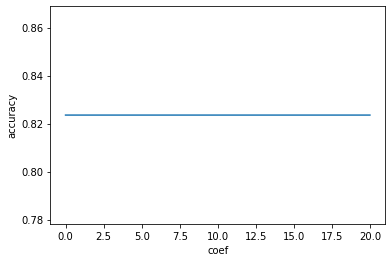

In [19]:
#画图
%matplotlib inline
plt.plot(coefNum,nc)
plt.xlabel('coef')
plt.ylabel('accuracy')

Text(0, 0.5, 'accuracy')

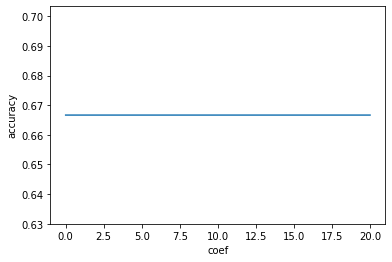

In [20]:
nc=accuncy[1:2,:]
nc=np.transpose(nc)
#画图
%matplotlib inline
plt.plot(coefNum,nc)
plt.xlabel('coef')
plt.ylabel('accuracy')

Text(0, 0.5, 'accuracy')

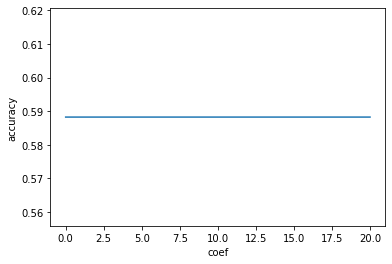

In [21]:
nc=accuncy[2:3,:]
nc=np.transpose(nc)
#画图
%matplotlib inline
plt.plot(coefNum,nc)
plt.xlabel('coef')
plt.ylabel('accuracy')

Text(0, 0.5, 'accuracy')

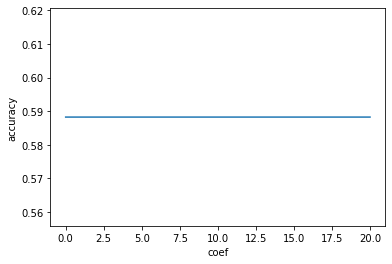

In [22]:
nc=accuncy[3:4,:]
nc=np.transpose(nc)
#画图
%matplotlib inline
plt.plot(coefNum,nc)
plt.xlabel('coef')
plt.ylabel('accuracy')

Text(0, 0.5, 'accuracy')

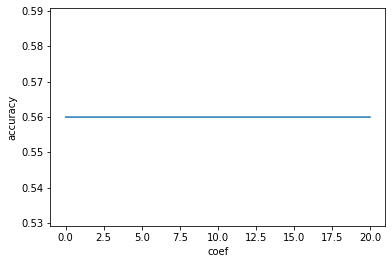

In [23]:
nc=accuncy[4:5,:]
nc=np.transpose(nc)
#画图
%matplotlib inline
plt.plot(coefNum,nc)
plt.xlabel('coef')
plt.ylabel('accuracy')